In [1]:
# Импортируем библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np

# Загружаем набор данных
data = pd.read_csv('databank1.csv', delimiter=';')
data.head()

,Unnamed: 0,CreditSum,sex,age,EducationStatus,kolichestvo_rabotnikov_v_organizacii,Employment,OrgStanding_N,kolichestvo_detej_mladshe_18,Residence,ConfirmedMonthlyIncome (Target)
0,0,500000.0,0,49,4,3,1,1.25,0,1,30691.36
1,1,708000.0,0,44,2,0,3,20.00,0,0,25712.07
2,2,665000.0,1,29,4,2,1,2.00,1,1,31081.26
3,3,458000.0,0,59,5,1,1,23.00,0,0,17848.79
4,4,969000.0,1,51,4,3,1,9.25,2,1,115380.53


In [2]:
data.pop('Unnamed: 0')
data.pop('kolichestvo_rabotnikov_v_organizacii')
data.pop('Employment')
data.pop('EducationStatus')
data.pop('Residence')
data.pop('sex')

# data.pop('OrgStanding_N')
# data.pop('ConfirmedMonthlyIncome (Target)')
# data.pop('age')
# data.pop('kolichestvo_detej_mladshe_18')
data.head()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
0,500000.0,49,1.25,0,30691.36
1,708000.0,44,20.00,0,25712.07
2,665000.0,29,2.00,1,31081.26
3,458000.0,59,23.00,0,17848.79
4,969000.0,51,9.25,2,115380.53


In [3]:
X = data.values[:,0:]
X = np.nan_to_num(X)
X

array([[5.000000e+05, 4.900000e+01, 1.250000e+00, 0.000000e+00,
        3.069136e+04],
       [7.080000e+05, 4.400000e+01, 2.000000e+01, 0.000000e+00,
        2.571207e+04],
       [6.650000e+05, 2.900000e+01, 2.000000e+00, 1.000000e+00,
        3.108126e+04],
       ...,
       [6.000000e+05, 3.400000e+01, 9.000000e+00, 1.000000e+00,
        6.486240e+04],
       [3.762500e+05, 2.600000e+01, 5.000000e-01, 0.000000e+00,
        3.132647e+04],
       [1.050000e+05, 3.300000e+01, 1.000000e+01, 1.000000e+00,
        7.117874e+04]])

In [4]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(data)
db11 = stscaler.transform(data)
db11

array([[ 0.31946113,  0.9136698 , -0.80127874, -0.74598626, -0.34685629],
       [ 0.99164819,  0.45604642,  1.4505279 , -0.74598626, -0.53033107],
       [ 0.85268644, -0.91682372, -0.71120647,  0.45927146, -0.33248942],
       ...,
       [ 0.64262799, -0.45920034,  0.12946801,  0.45927146,  0.9122638 ],
       [-0.08045785, -1.19139774, -0.891351  , -0.74598626, -0.32345402],
       [-0.95704795, -0.55072501,  0.24956436,  0.45927146,  1.14500564]])

In [5]:
import pyclustering
from pyclustering.cluster.cure import cure
from pyclustering.cluster import cluster_visualizer;

In [6]:
cure_instance = cure(db11, 5, 5, 2, True);

In [7]:
cure_instance.process();
clusters = cure_instance.get_clusters();
clusters

[[3633,
  7748,
  4705,
  3979,
  4979,
  9203,
  10469,
  1195,
  1278,
  9972,
  1833,
  2044,
  5907,
  1147,
  8420,
  2993,
  3001,
  9783,
  5467,
  7388,
  3431,
  6823],
 [695, 4353, 7786, 8423],
 [2496,
  8893,
  8128,
  6093,
  8841,
  8778,
  9436,
  2610,
  678,
  7450,
  1888,
  1103,
  9499,
  9234,
  2353,
  2219,
  3938,
  7385,
  1832,
  8182,
  10037,
  7020,
  9902,
  2139,
  7248,
  3004,
  9671,
  4934,
  130,
  1250,
  5403,
  437,
  1228,
  5281,
  1643,
  3116,
  8016,
  5436,
  6871,
  9435,
  162,
  2581,
  4297,
  6663,
  6919,
  7410,
  925,
  2031,
  3572,
  1860,
  640,
  3039,
  10358,
  463,
  397,
  7593,
  937,
  2821,
  1488,
  7277,
  61,
  7291,
  10072,
  2495,
  1795,
  1271,
  6269,
  3807,
  3244,
  6400,
  5695,
  2000,
  4355,
  4672,
  10363,
  4501,
  10269,
  2079,
  4264,
  5329,
  7366,
  77,
  10381,
  383,
  855,
  8682,
  961,
  5079,
  122,
  3820,
  4041,
  985,
  8083,
  634,
  4349,
  7307,
  406,
  7762,
  6838,
  4350,
  7553,
  

In [8]:
print(len(clusters[0]))
print(len(clusters[1]))
print(len(clusters[2]))
print(len(clusters[3]))
print(len(clusters[4]))

22
4
10474
2
3


In [9]:
# clusters[0]

In [10]:
clusters_scaled = data.copy()
# clusters_scaled

In [11]:
clusters_scaled['cluster_pred'] = 2
clusters_scaled

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),cluster_pred
0,500000.00,49,1.250000,0,30691.360,2
1,708000.00,44,20.000000,0,25712.070,2
2,665000.00,29,2.000000,1,31081.260,2
3,458000.00,59,23.000000,0,17848.790,2
4,969000.00,51,9.250000,2,115380.530,2
5,35000.00,35,5.500000,0,39578.970,2
6,701000.00,54,1.500000,0,50052.420,2
7,710000.00,34,9.250000,2,100050.000,2
8,240000.00,26,3.916666,0,34000.580,2
9,120400.00,23,3.000000,0,47266.040,2


In [12]:
for i in range(0,10505):
    for j in range(0,len(clusters[0])):
        if(clusters[0][j]==i):
            clusters_scaled['cluster_pred'][i] = 0
clusters_scaled

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),cluster_pred
0,500000.00,49,1.250000,0,30691.360,2
1,708000.00,44,20.000000,0,25712.070,2
2,665000.00,29,2.000000,1,31081.260,2
3,458000.00,59,23.000000,0,17848.790,2
4,969000.00,51,9.250000,2,115380.530,2
5,35000.00,35,5.500000,0,39578.970,2
6,701000.00,54,1.500000,0,50052.420,2
7,710000.00,34,9.250000,2,100050.000,2
8,240000.00,26,3.916666,0,34000.580,2
9,120400.00,23,3.000000,0,47266.040,2


In [13]:
for i in range(0,10505):
    for j in range(0,len(clusters[1])):
        if(clusters[1][j]==i):
            clusters_scaled['cluster_pred'][i] = 1

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [14]:
# for i in range(0,10505):
#     for j in range(0,len(clusters[2])):
#         if(clusters[2][j]==i):
#             clusters_scaled['cluster_pred'][i] = 2

In [15]:
for i in range(0,10505):
    for j in range(0,len(clusters[3])):
        if(clusters[3][j]==i):
            clusters_scaled['cluster_pred'][i] = 3

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
for i in range(0,10505):
    for j in range(0,len(clusters[4])):
        if(clusters[4][j]==i):
            clusters_scaled['cluster_pred'][i] = 4

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [17]:
# элементы с кластером 4
for i in range(0,10505):
    if(clusters_scaled['cluster_pred'][i] == 4):
        print(i)

273
2265
8071


In [18]:
clusters_scaled

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),cluster_pred
0,500000.00,49,1.250000,0,30691.360,2
1,708000.00,44,20.000000,0,25712.070,2
2,665000.00,29,2.000000,1,31081.260,2
3,458000.00,59,23.000000,0,17848.790,2
4,969000.00,51,9.250000,2,115380.530,2
5,35000.00,35,5.500000,0,39578.970,2
6,701000.00,54,1.500000,0,50052.420,2
7,710000.00,34,9.250000,2,100050.000,2
8,240000.00,26,3.916666,0,34000.580,2
9,120400.00,23,3.000000,0,47266.040,2


In [19]:
clusters_scaled.to_csv("curedata.csv", sep=';')

In [20]:
curedata = pd.read_csv('curedata.csv', delimiter=';')
curedata.head()

,Unnamed: 0,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),cluster_pred
0,0,500000.0,49,1.25,0,30691.36,2
1,1,708000.0,44,20.00,0,25712.07,2
2,2,665000.0,29,2.00,1,31081.26,2
3,3,458000.0,59,23.00,0,17848.79,2
4,4,969000.0,51,9.25,2,115380.53,2


In [24]:
# Возвращает список средних значений каждого кластера
# cure_instance.get_means()

In [25]:
kolKl=5
kolOb=5

In [26]:
# Возвращает список средних значений каждого кластера
clustCentr = cure_instance.get_means()
clustCentr = np.asarray(clustCentr)
# clustCentr = np.transpose(clustCentr)
clustCentr

array([[ 2.89106873e+00,  1.39870266e-01,  2.30189437e-02,
         1.99323582e+00,  6.90951710e+00],
       [-6.31021065e-01,  1.60010486e+00,  1.11025488e+00,
        -7.45986262e-01,  4.98913962e+00],
       [-7.29048793e-03, -1.24490575e-03, -1.18868401e-03,
        -5.15666602e-03, -1.68809731e-02],
       [ 2.23390158e+00, -5.04962676e-01, -7.66250715e-01,
         7.69081777e+00,  1.91987172e+00],
       [ 3.60444655e+00,  1.52383430e+00,  3.01178051e+00,
        -7.45986262e-01,  3.35211470e-01]])

In [27]:
import math
from math import sqrt

In [28]:
# кол-во элементов в каждом кластере
N = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for l in range(0,kolKl):
    N[l] = clusters_scaled.groupby(['cluster_pred'])['CreditSum'].count()[l]
    print(N[l])

22
4
10474
2
3


In [29]:
# общий центр (координаты)
obcentrx = [0,0,0,0,0,0,0,0,0,0,0]
# j - номер признака
for j in range(0,kolOb):
    for l in range(0,kolKl):
        obcentrx[j] = obcentrx[j]+N[l]*clustCentr[l][j]
    obcentrx[j]=obcentrx[j]/10505
    print(obcentrx[j])

1.5878144428337316e-16
-9.925953971708206e-17
-1.5506132524797999e-16
1.8346950697280073e-17
6.725806119671105e-17


In [30]:
# вычисляем евклидово расстояние от центра кластера до общего центра
d=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
d2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for l in range(0,kolKl):
    for j in range(0,kolOb):
        d2[l] = d2[l]+(clustCentr[l][j]-obcentrx[j])**2 
        d[l] = math.sqrt(d2[l])
    print(d[l])
    print(d2[l])
    print('------')

7.7519537934785125
60.092787616225905
------
5.444189447074249
29.639198735634626
------
0.01917478637892742
0.00036767243267750053
------
8.286557130420041
68.66702907571522
------
5.005376108213191
25.053789984671432
------


In [31]:
# средневзвешенный разброс от центра кластера до общего центра (межкластерное расстояние)
k=0
k2=0
for l in range(0,kolKl):
    k=k+N[l]*d[l]
    k2=k2+N[l]*d2[l]
k=k/10505
k2=k2/10505
print (k)
print (k2)
SSM=k2

0.04043271740725272
0.1577291339043139


In [32]:
# средний разброс в каждом кластере от объектов до центра кластера
s1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
a1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(0, 10505):
    #dd - расстояние от i-го объекта до центра его кластера
    dd=0
    dd2=0
    l=clusters_scaled['cluster_pred'][i]
    a1[l]=a1[l]+1
    for j in range(0,kolOb):
        dd2=dd2+(db11[i][j]-clustCentr[l][j])**2
    dd= math.sqrt(dd2)   
    s1[l] = s1[l]+ dd
    s2[l]=s2[l]+dd2
for l in range(0, kolKl):
    s1[l]=s1[l]/a1[l]
    s2[l]=s2[l]/a1[l]
    print(a1[l])
    print(s1[l])
    print(s2[l])

22
3.580038446723523
14.680078860458956
4
1.25325660266085
1.9517025784054214
10474
2.025229345670512
4.823677399160904
2
1.3583815571013655
1.8452004546731307
3
1.8405304260233006
3.4664744569923602


In [33]:
# средний внутрикластерный разброс по всем кластерам
k=0
k2=0
for l in range(0,kolKl):
    k=k+N[l]*s1[l]
    k2=k2+N[l]*s2[l]
k=k/10507
k2=k2/10507
print (k)
print (k2)
SSV=k2

2.0276258107151213
4.841349143269759


In [34]:
# средний разброс от объектов до общего центра 
s2=0
s4=0
for i in range(0, 10505):
    #dd - расстояние от i-го объекта до общего центра
    dd=0
    dd2=0
    for j in range(0,kolOb):
        dd2=dd2+(db11[i][j]-obcentrx[j])**2
    dd= math.sqrt(dd2)   
    s2 = s2+dd
    s4 = s4+dd2
s2=s2/10505
s4=s4/10505
print(s2)
print(s4)
SS=s4

2.0435481431024822
4.999999999999993


In [35]:
# доля межгруппового разброса в общем разбросе
dol=SSM/SS
dol

0.031545826780862825

In [19]:
import researchpy as rp
rp.summary_cont(clusters_scaled['CreditSum'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,CreditSum,10505.0,401146.6904,309452.4029,3019.2274,395228.4314,407064.9494


In [24]:
rp.summary_cont(clusters_scaled['ConfirmedMonthlyIncome (Target)'].groupby(clusters_scaled['cluster_pred']))

,N,Mean,SD,SE,95% Conf.,Interval
cluster_pred,,,,,,
0,22,227620.8086,49742.1656,10605.0653,205566.3679,249675.2493
1,4,175504.0200,11676.0925,5838.0462,156924.7513,194083.2887
2,10474,39646.5024,25530.0847,249.4572,39157.5189,40135.4860
3,2,92207.6950,50065.8259,35401.8850,-357615.9039,542031.2939
4,3,49201.8777,25471.7097,14706.0984,-14073.3569,112477.1122


In [22]:
# дисперсионный анализ
import matplotlib
matplotlib.use('TkAgg')
import scipy.stats as stats

In [23]:
stats.f_oneway(clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 4])

F_onewayResult(statistic=60.062671280847226, pvalue=3.101818383921808e-50)

In [24]:
stats.f_oneway(clusters_scaled['age'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 4])

F_onewayResult(statistic=4.546741272163276, pvalue=0.0011416447045160332)

In [25]:
stats.f_oneway(clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 4])

F_onewayResult(statistic=8.358529650736045, pvalue=9.965446644565759e-07)

In [26]:
stats.f_oneway(clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 4])

F_onewayResult(statistic=53.51343469819195, pvalue=1.0259176935857701e-44)

In [27]:
stats.f_oneway(clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 4])

F_onewayResult(statistic=326.02304342925584, pvalue=6.86902039212778e-265)

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('CreditSum ~ cluster_pred', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred,8.792596e+12,1.0,92.619202,7.799613e-22
Residual,9.970787e+14,10503.0,NaN,NaN


In [29]:
bins = [-1, 0, 1, 2, 3, 10]
labels = ['Нулевой', 'Первый','Второй','Третий','Четвертый']

clusters_scaled['cluster_pred_cat'] = pd.cut(clusters_scaled['cluster_pred'], bins=bins, labels=labels)

In [30]:
clusters_scaled.head()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),cluster_pred,cluster_pred_cat
0,500000.0,49,1.25,0,30691.36,2,Второй
1,708000.0,44,20.00,0,25712.07,2,Второй
2,665000.0,29,2.00,1,31081.26,2,Второй
3,458000.0,59,23.00,0,17848.79,2,Второй
4,969000.0,51,9.25,2,115380.53,2,Второй


In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('CreditSum ~ cluster_pred_cat', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred_cat,2.250052e+13,4.0,60.062671,3.101818e-50
Residual,9.833708e+14,10500.0,NaN,NaN


In [35]:
model = ols('age ~ cluster_pred_cat', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred_cat,2.168398e+03,4.0,4.546741,0.001142
Residual,1.251895e+06,10500.0,NaN,NaN


In [37]:
model = ols('OrgStanding_N ~ cluster_pred_cat', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred_cat,2311.832181,4.0,8.35853,9.965447e-07
Residual,726031.937225,10500.0,NaN,NaN


In [39]:
model = ols('kolichestvo_detej_mladshe_18 ~ cluster_pred_cat', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred_cat,144.479161,4.0,53.513435,1.025918e-44
Residual,7087.151110,10500.0,NaN,NaN


In [40]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
cluster_pred_cat,144.479161,4.0,36.119790,53.513435,1.025918e-44,0.019979,0.019604
Residual,7087.151110,10500.0,0.674967,NaN,NaN,NaN,NaN


In [45]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

# ax.set_title("Box Plot of Libido by Dosage", fontsize= 20)
ax.set

data = [clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 0],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 1],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 2],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 3],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 4]]

ax.boxplot(data,
           labels= ['0', '1', '2', '3', '4'],
           showmeans= True)

plt.xlabel("Clusters")
plt.ylabel("lll")

plt.show()


In [45]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(clusters_scaled['CreditSum'], clusters_scaled['cluster_pred'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-1089867.2727,0.001,-1543693.8482,-636040.6973,True
0,2,-896861.534,0.001,-1075053.8087,-718669.2592,True
0,3,-203352.2727,0.8947,-819981.1634,413276.6179,False
0,4,220745.9739,0.7402,-293111.4349,734603.3828,False
1,2,193005.7388,0.6896,-224533.6996,610545.1771,False
1,3,886515.0,0.0074,163453.5333,1609576.4667,True
1,4,1310613.2467,0.001,672932.9722,1948293.5212,True
2,3,693509.2612,0.0118,103075.6826,1283942.8399,True
2,4,1117607.5079,0.001,635497.5011,1599717.5147,True
3,4,424098.2467,0.5438,-338075.461,1186271.9543,False


In [47]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(clusters_scaled['CreditSum'], clusters_scaled['cluster_pred'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl


group1,group2,stat,pval,pval_corr,reject
0,1,2.3191,0.0292,0.2922,False
0,2,13.732,0.0,0.0,True
0,3,0.306,0.7625,1.0,False
0,4,-0.4024,0.6911,1.0,False
1,2,-1.2716,0.2036,1.0,False
1,3,-5.1128,0.0069,0.0692,False
1,4,-4.8687,0.0046,0.046,True
2,3,-3.2309,0.0012,0.0124,True
2,4,-6.3754,0.0,0.0,True
3,4,-1.1438,0.3357,1.0,False


In [48]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(clusters_scaled['CreditSum'], clusters_scaled['cluster_pred'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "sidak")

tbl

group1,group2,stat,pval,pval_corr,reject
0,1,2.3191,0.0292,0.2566,False
0,2,13.732,0.0,0.0,True
0,3,0.306,0.7625,1.0,False
0,4,-0.4024,0.6911,1.0,False
1,2,-1.2716,0.2036,0.8973,False
1,3,-5.1128,0.0069,0.0671,False
1,4,-4.8687,0.0046,0.045,True
2,3,-3.2309,0.0012,0.0123,True
2,4,-6.3754,0.0,0.0,True
3,4,-1.1438,0.3357,0.9833,False


In [49]:
from scipy import stats
f_value, p_value = stats.f_oneway(clusters_scaled['CreditSum'], clusters_scaled['cluster_pred'])
p_value

0.0

C:\Users\asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric

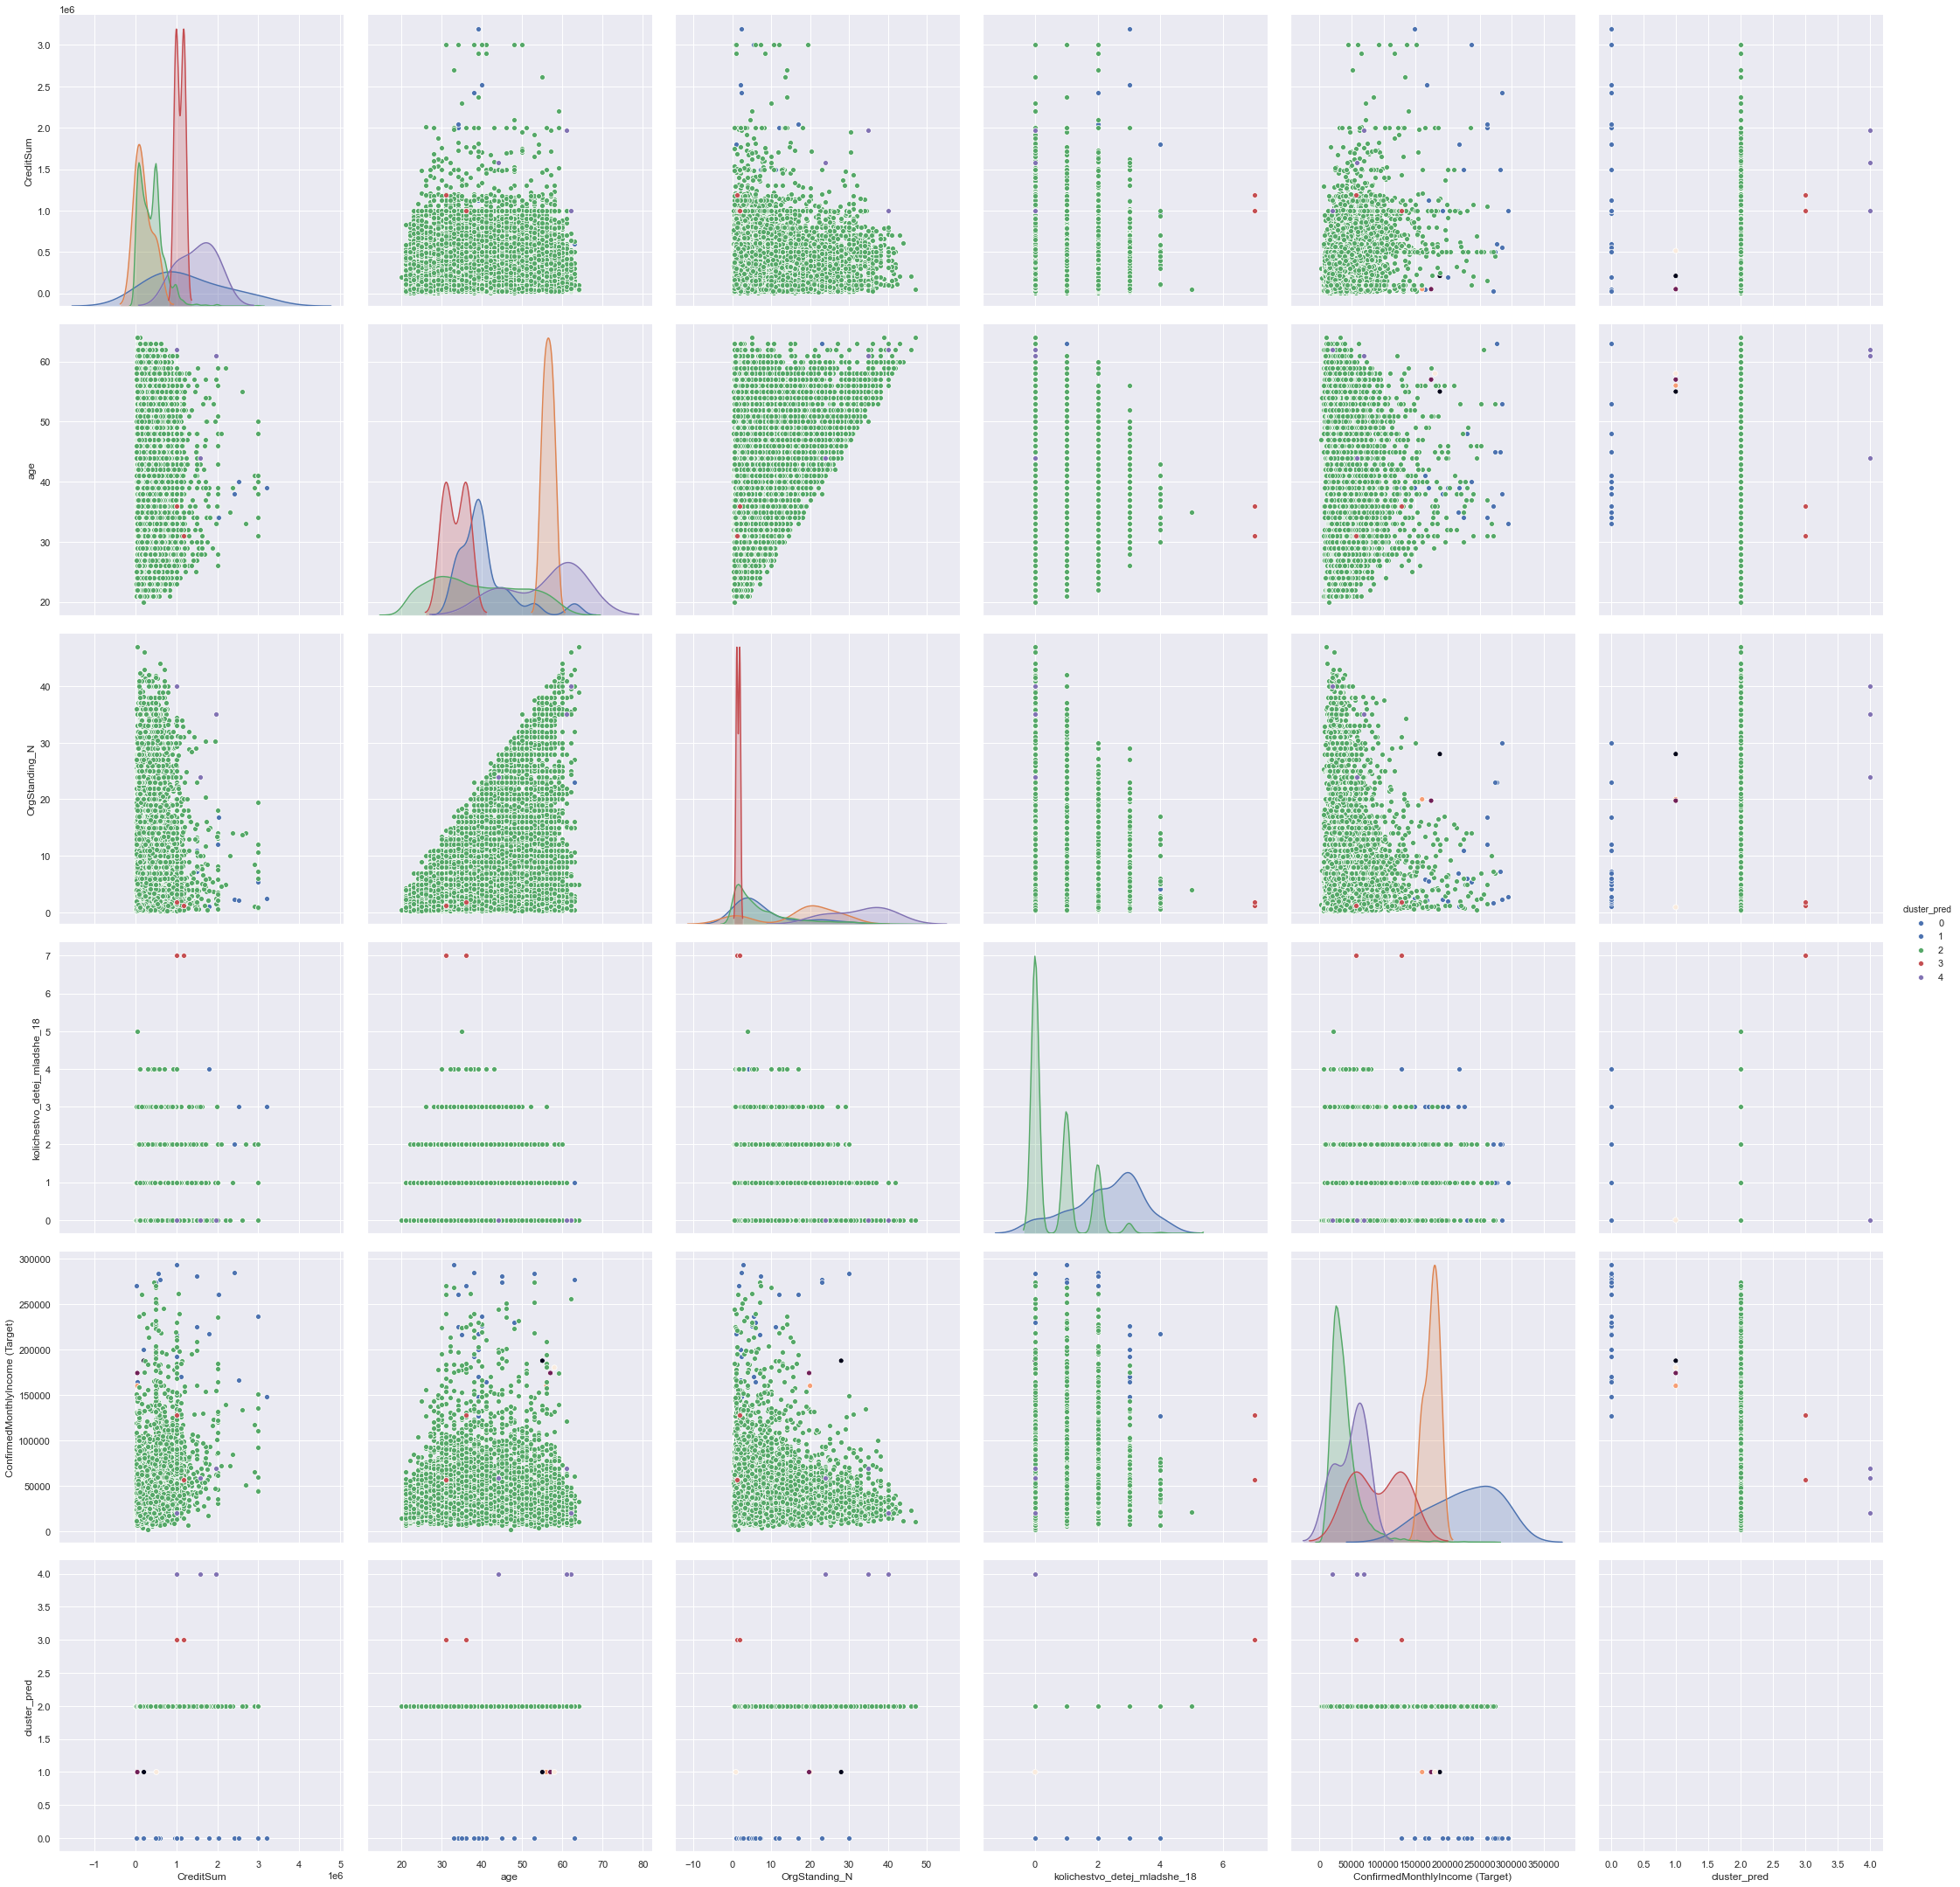

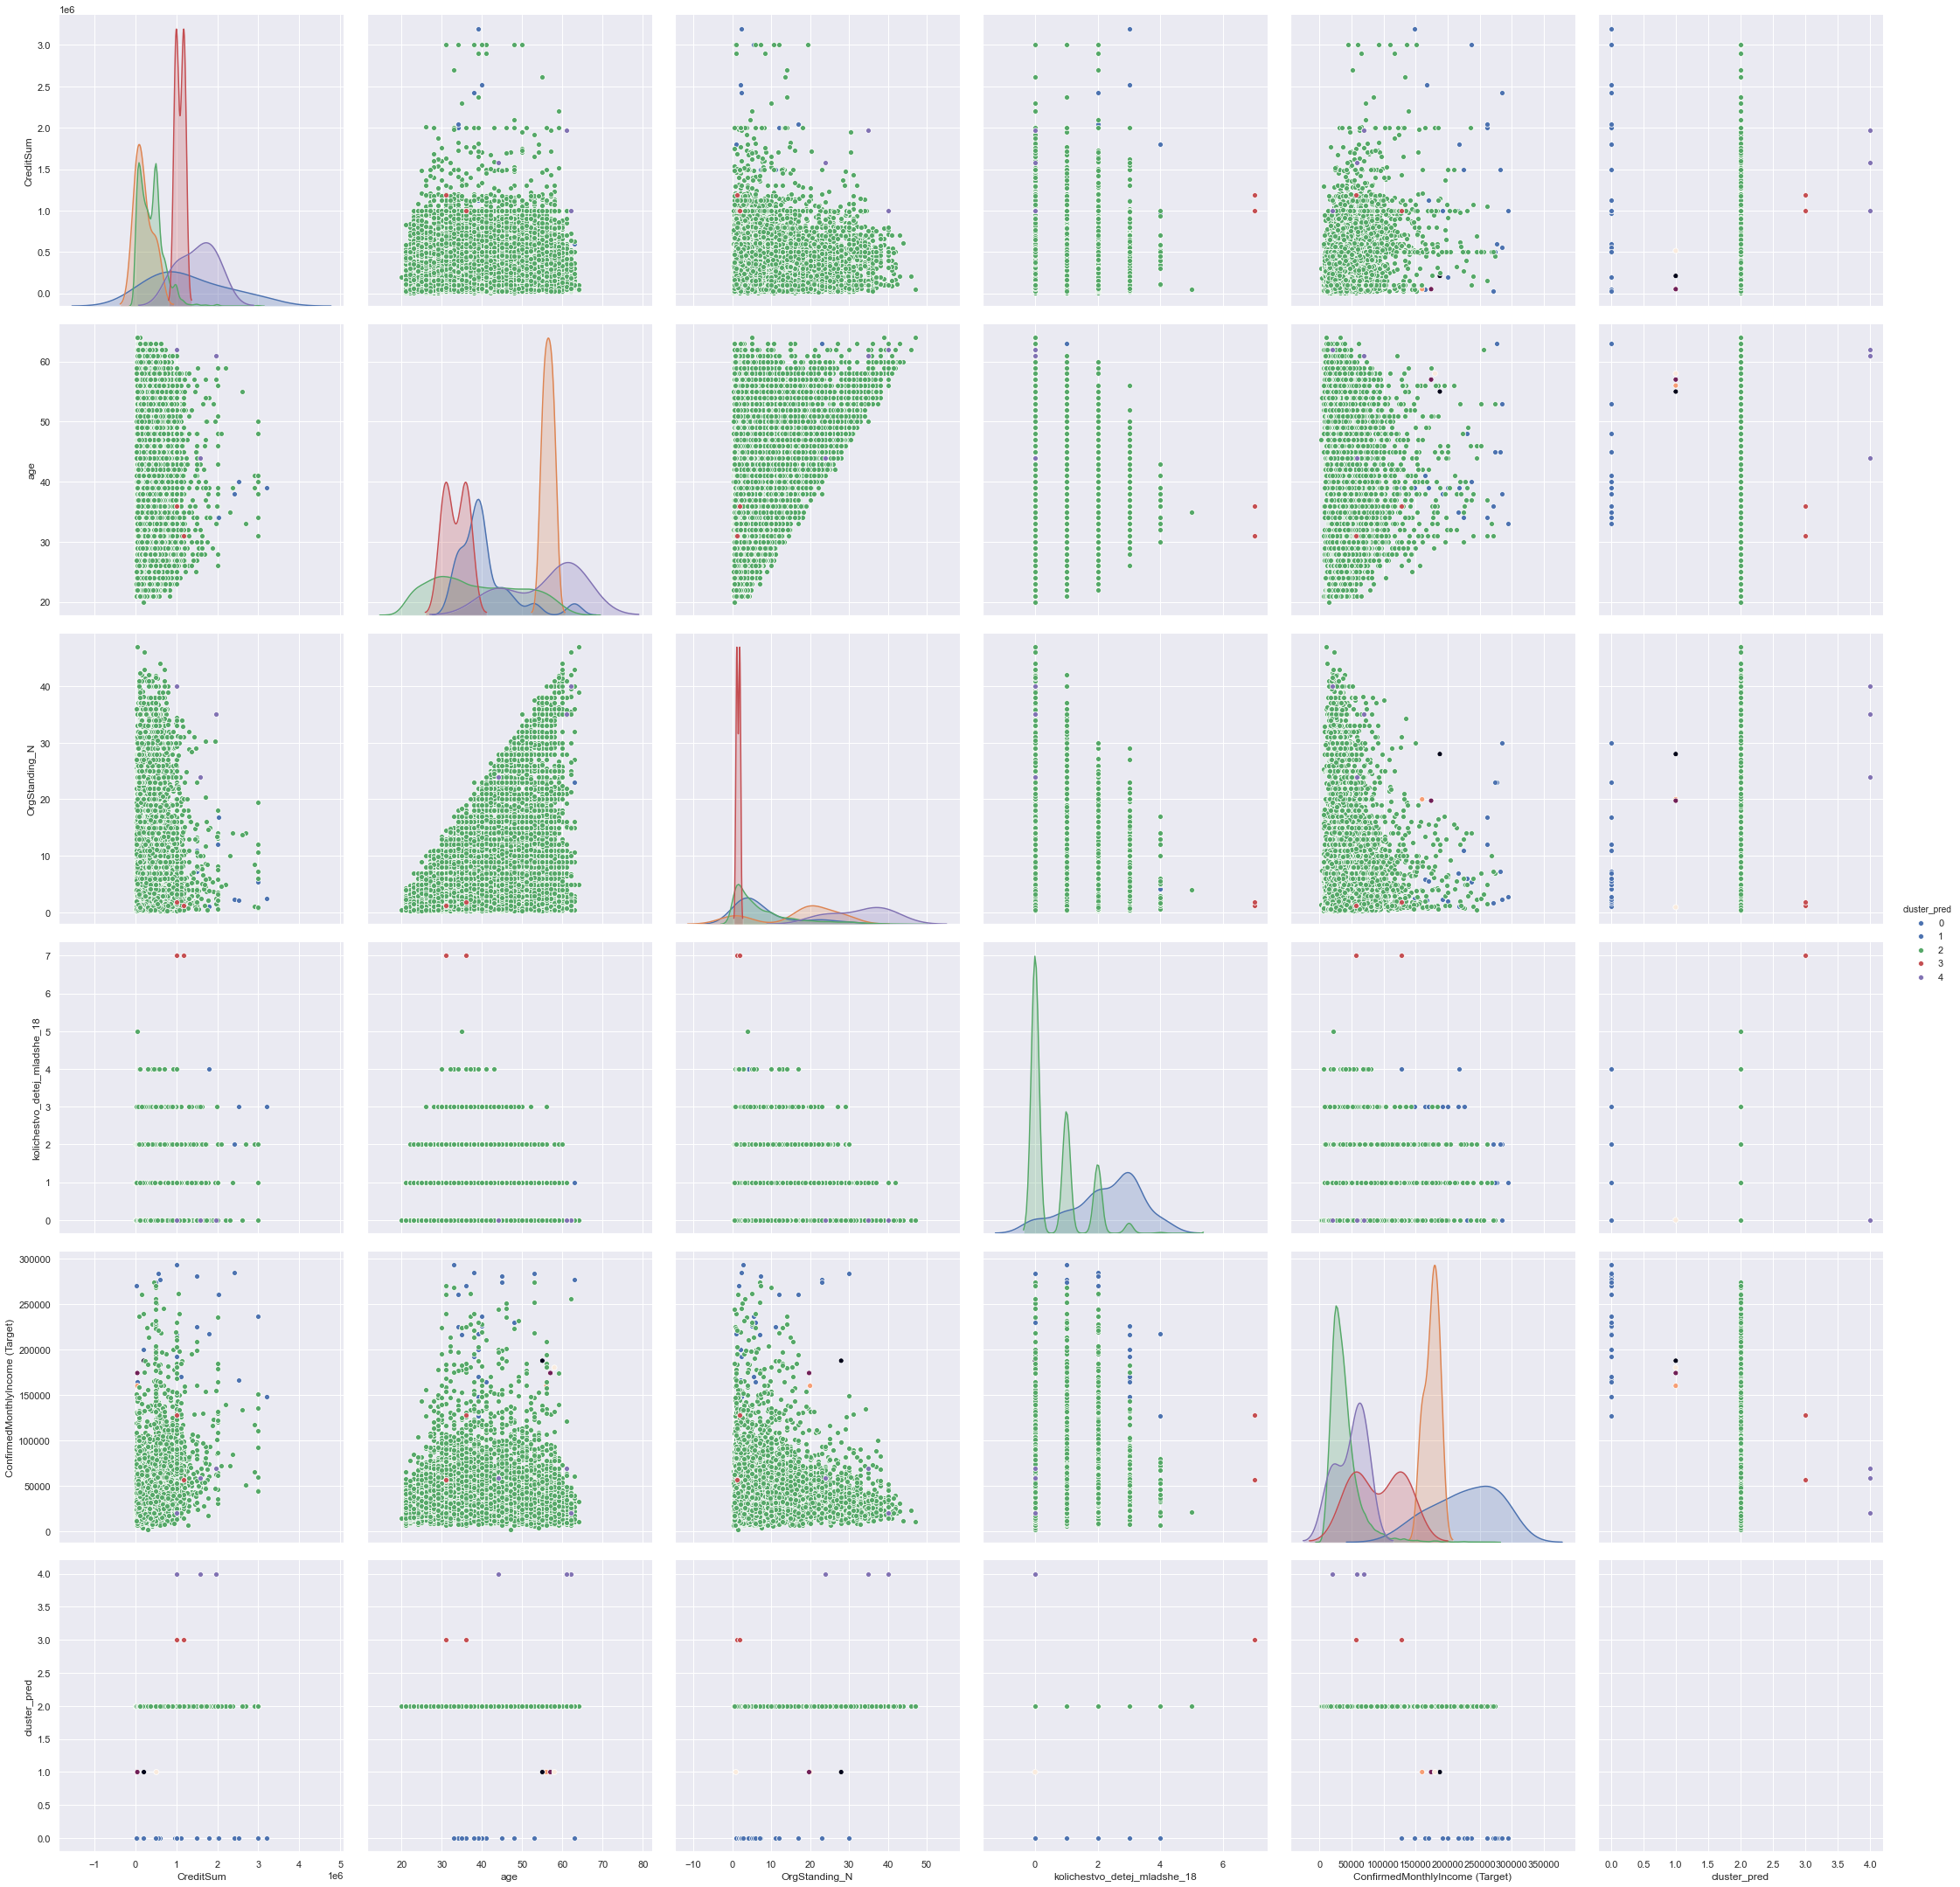

In [20]:
sns.pairplot(clusters_scaled, hue='cluster_pred', size=5, diag_kind='kde')
sns_plot = sns.pairplot(clusters_scaled, hue='cluster_pred', size=5, diag_kind='kde')
sns_plot.savefig("cureimg.png")